In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('/home/ishaq/luminar/laptop_data.csv')
data.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
data.tail()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.64
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.72
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.12
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.92
1302,1302,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,19660.32


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [6]:
data.describe()

,Unnamed: 0,Inches,Price
count,1303.00000,1303.000000,1303.000000
mean,651.00000,15.017191,59870.042910
std,376.28801,1.426304,37243.201786
min,0.00000,10.100000,9270.720000
25%,325.50000,14.000000,31914.720000
50%,651.00000,15.600000,52054.560000
75%,976.50000,15.600000,79274.246400
max,1302.00000,18.400000,324954.720000


In [7]:
data.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [8]:
data.isna().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [9]:
cat_data=[i for i in data.columns if data[i].dtype=='O']
cat_data

['Company',
 'TypeName',
 'ScreenResolution',
 'Cpu',
 'Ram',
 'Memory',
 'Gpu',
 'OpSys',
 'Weight']

In [10]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [11]:
data['Ram']=data['Ram'].str.replace('GB','')
data['Weight']=data['Weight'].str.replace('kg','')
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [13]:
data['Ram']=data['Ram'].astype('int')
data['Weight']=data['Weight'].astype('float32')

In [14]:
data.corr()

/tmp/ipykernel_3486/2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Inches,Ram,Weight,Price
Inches,1.000000,0.237993,0.827631,0.068197
Ram,0.237993,1.000000,0.383874,0.743007
Weight,0.827631,0.383874,1.000000,0.210370
Price,0.068197,0.743007,0.210370,1.000000


/tmp/ipykernel_3486/1794321463.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<Axes: >

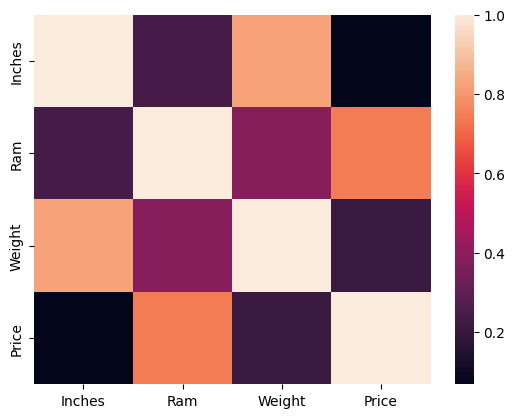

In [15]:
sns.heatmap(data.corr())

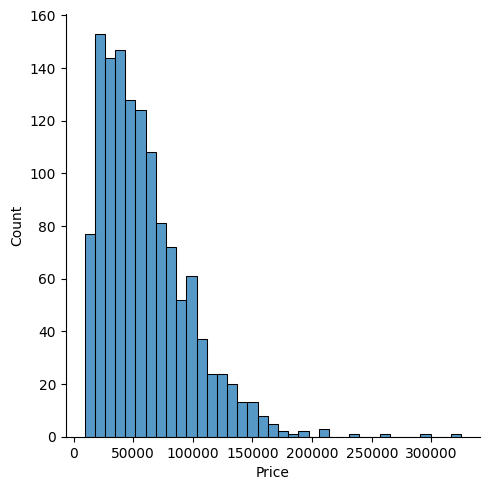

In [16]:
sns.displot(data['Price'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Apple'),
  Text(1, 0, 'HP'),
  Text(2, 0, 'Acer'),
  Text(3, 0, 'Asus'),
  Text(4, 0, 'Dell'),
  Text(5, 0, 'Lenovo'),
  Text(6, 0, 'Chuwi'),
  Text(7, 0, 'MSI'),
  Text(8, 0, 'Microsoft'),
  Text(9, 0, 'Toshiba'),
  Text(10, 0, 'Huawei'),
  Text(11, 0, 'Xiaomi'),
  Text(12, 0, 'Vero'),
  Text(13, 0, 'Razer'),
  Text(14, 0, 'Mediacom'),
  Text(15, 0, 'Samsung'),
  Text(16, 0, 'Google'),
  Text(17, 0, 'Fujitsu'),
  Text(18, 0, 'LG')])

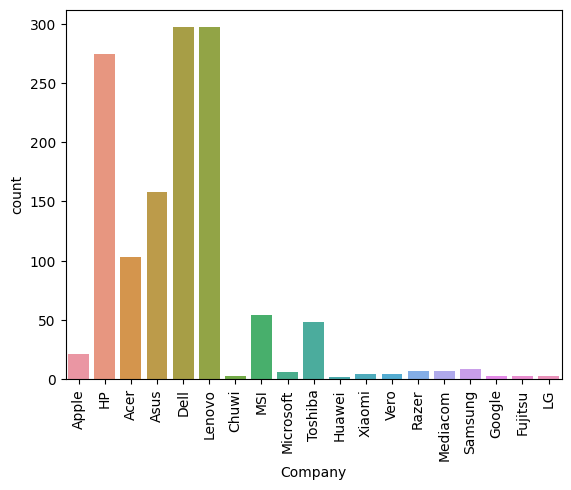

In [17]:
sns.countplot(x=data['Company'])
plt.xticks(rotation=90)

<Axes: >

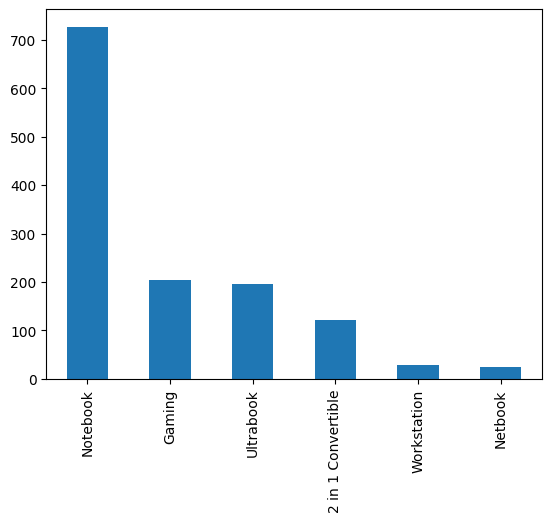

In [18]:
data.TypeName.value_counts().plot(kind='bar')

Column ScreenResolution Extraction

In [19]:
data['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [20]:
data['Touchscreen']=data['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
data.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
766,Asus,Notebook,17.3,1366x768,Intel Pentium Quad Core N4200 1.1GHz,4,1TB HDD,Nvidia GeForce 920MX,Windows 10,2.80,25059.7152,0
488,Lenovo,Ultrabook,12.5,IPS Panel Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,16,512GB SSD,Intel HD Graphics 620,Windows 10,1.36,95797.4400,0
782,Toshiba,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i7 6600U 2.6GHz,16,512GB SSD,Nvidia GeForce 930M,Windows 10,1.47,93985.9200,0
1010,Dell,Gaming,15.6,Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8,1.0TB Hybrid,Nvidia GeForce GTX 1050,Windows 10,2.65,50562.7200,0
402,Lenovo,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD + 1TB HDD,AMD Radeon RX 550,Windows 10,2.10,60978.9600,0


In [21]:
data['ips']=data['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,ips
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


In [22]:
data['display_type']=data['ScreenResolution'].apply(lambda x:" ".join(x.split()[0:-1]))
data['display_type']=data['display_type'].str.replace('IPS Panel','')
data['display_type']=data['display_type'].str.replace('Touchscreen','')
data['display_type']=data['display_type'].str.replace(' ','')
data['display_type']=data['display_type'].str.replace('/','')
data['display_type'].value_counts()

FullHD           843
                 370
4KUltraHD         43
QuadHD+           30
RetinaDisplay     17
Name: display_type, dtype: int64

In [23]:
new= data['ScreenResolution'].str.split('x',n=1,expand=True)

new[0]= new [0].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])
data['x_res']=new[0].astype('int')
data['y_res']=new[1].astype('int')
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,ips,display_type,x_res,y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,RetinaDisplay,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,FullHD,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,RetinaDisplay,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,RetinaDisplay,2560,1600


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int64  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  ips               1303 non-null   int64  
 13  display_type      1303 non-null   object 
 14  x_res             1303 non-null   int64  
 15  y_res             1303 non-null   int64  
dtypes: float32(1), float64(2), int64(5), objec

In [25]:
data.corr()['Price']

/tmp/ipykernel_3486/736241161.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['Price']


Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
ips            0.252208
x_res          0.556529
y_res          0.552809
Name: Price, dtype: float64

In [26]:
data['ppi']=(((data['x_res']**2+data['y_res']**2))**0.5/data['Inches']).astype('float')

In [27]:
data.drop(['ScreenResolution','Inches','x_res','y_res'],axis=1,inplace=True)

In [28]:
data.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,ips,display_type,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,RetinaDisplay,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,FullHD,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,RetinaDisplay,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,RetinaDisplay,226.983005


Column cpu Extraction

In [29]:
data['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [30]:
data['Cpu_name']=data['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))


In [31]:
def processor(text):
    if text=='Intel Core i7' or text=='Intel Core i5' or text=='Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

data['Cpu_brand']=data['Cpu_name'].apply(processor)
data.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,ips,display_type,ppi,Cpu_name,Cpu_brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,RetinaDisplay,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,FullHD,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,RetinaDisplay,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,RetinaDisplay,226.983005,Intel Core i5,Intel Core i5


In [32]:
data.drop(['Cpu_name','Cpu'],axis=1,inplace=True)
data.tail()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,ips,display_type,ppi,Cpu_brand
1298,Lenovo,2 in 1 Convertible,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.64,1,1,FullHD,157.350512,Intel Core i7
1299,Lenovo,2 in 1 Convertible,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.72,1,1,QuadHD+,276.053530,Intel Core i7
1300,Lenovo,Notebook,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.12,0,0,,111.935204,Other Intel Processor
1301,HP,Notebook,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.92,0,0,,100.454670,Intel Core i7
1302,Asus,Notebook,4,500GB HDD,Intel HD Graphics,Windows 10,2.20,19660.32,0,0,,100.454670,Other Intel Processor


Gpu column extraction

In [33]:
data['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [34]:
data['Gpu_brand']=data['Gpu'].apply(lambda x:x.split()[0])
data.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,ips,display_type,ppi,Cpu_brand,Gpu_brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,RetinaDisplay,226.983005,Intel Core i5,Intel
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,,127.677940,Intel Core i5,Intel
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,FullHD,141.211998,Intel Core i5,Intel
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,RetinaDisplay,220.534624,Intel Core i7,AMD
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,RetinaDisplay,226.983005,Intel Core i5,Intel


In [35]:
data.drop('Gpu',axis=1,inplace=True)
data.head()


,Company,TypeName,Ram,Memory,OpSys,Weight,Price,Touchscreen,ips,display_type,ppi,Cpu_brand,Gpu_brand
0,Apple,Ultrabook,8,128GB SSD,macOS,1.37,71378.6832,0,1,RetinaDisplay,226.983005,Intel Core i5,Intel
1,Apple,Ultrabook,8,128GB Flash Storage,macOS,1.34,47895.5232,0,0,,127.677940,Intel Core i5,Intel
2,HP,Notebook,8,256GB SSD,No OS,1.86,30636.0000,0,0,FullHD,141.211998,Intel Core i5,Intel
3,Apple,Ultrabook,16,512GB SSD,macOS,1.83,135195.3360,0,1,RetinaDisplay,220.534624,Intel Core i7,AMD
4,Apple,Ultrabook,8,256GB SSD,macOS,1.37,96095.8080,0,1,RetinaDisplay,226.983005,Intel Core i5,Intel


OpSys column extraction

In [36]:
data['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [37]:
def os(value):
    if value=='Windows 10' or value=='Windows 7' or value=='Windows 10 S':
        return 'Windows'
    elif value=='macOS' or value=='Mac OS X':
        return 'Mac'
    else:
        return 'Linux/No OS/Others'
data['Os']=data['OpSys'].apply(os)

In [38]:
data.head()

,Company,TypeName,Ram,Memory,OpSys,Weight,Price,Touchscreen,ips,display_type,ppi,Cpu_brand,Gpu_brand,Os
0,Apple,Ultrabook,8,128GB SSD,macOS,1.37,71378.6832,0,1,RetinaDisplay,226.983005,Intel Core i5,Intel,Mac
1,Apple,Ultrabook,8,128GB Flash Storage,macOS,1.34,47895.5232,0,0,,127.677940,Intel Core i5,Intel,Mac
2,HP,Notebook,8,256GB SSD,No OS,1.86,30636.0000,0,0,FullHD,141.211998,Intel Core i5,Intel,Linux/No OS/Others
3,Apple,Ultrabook,16,512GB SSD,macOS,1.83,135195.3360,0,1,RetinaDisplay,220.534624,Intel Core i7,AMD,Mac
4,Apple,Ultrabook,8,256GB SSD,macOS,1.37,96095.8080,0,1,RetinaDisplay,226.983005,Intel Core i5,Intel,Mac


In [39]:
data.drop('OpSys',axis=1,inplace=True)

In [42]:
data.corr()['Price']

/tmp/ipykernel_3486/736241161.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['Price']


Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
ips            0.252208
ppi            0.473487
Name: Price, dtype: float64

/tmp/ipykernel_3486/1794321463.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<Axes: >

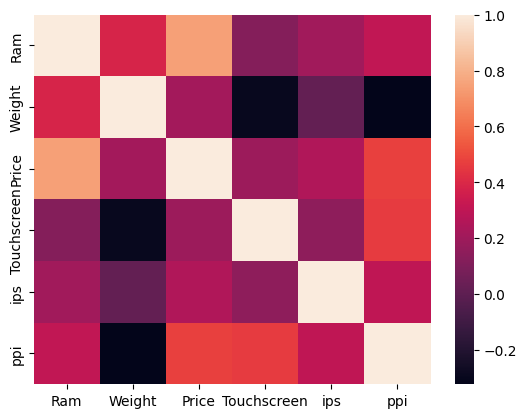

In [43]:
sns.heatmap(data.corr())

/tmp/ipykernel_3486/460424880.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(data['Price']))


<Axes: xlabel='Price', ylabel='Density'>

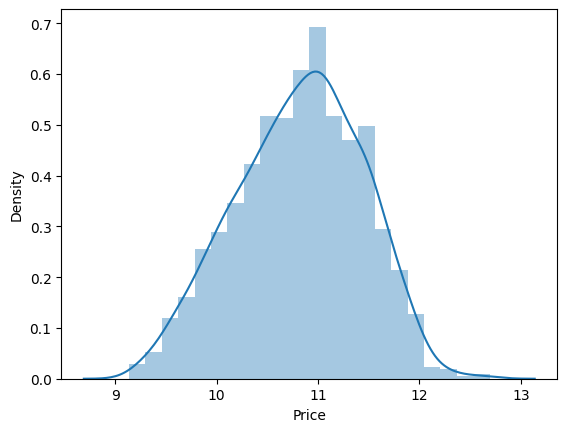

In [44]:
sns.distplot(np.log(data['Price']))

In [47]:
x=data.drop(['Price'],axis=1)
y=data['Price']
x

,Company,TypeName,Ram,Memory,Weight,Touchscreen,ips,display_type,ppi,Cpu_brand,Gpu_brand,Os
0,Apple,Ultrabook,8,128GB SSD,1.37,0,1,RetinaDisplay,226.983005,Intel Core i5,Intel,Mac
1,Apple,Ultrabook,8,128GB Flash Storage,1.34,0,0,,127.677940,Intel Core i5,Intel,Mac
2,HP,Notebook,8,256GB SSD,1.86,0,0,FullHD,141.211998,Intel Core i5,Intel,Linux/No OS/Others
3,Apple,Ultrabook,16,512GB SSD,1.83,0,1,RetinaDisplay,220.534624,Intel Core i7,AMD,Mac
4,Apple,Ultrabook,8,256GB SSD,1.37,0,1,RetinaDisplay,226.983005,Intel Core i5,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,128GB SSD,1.80,1,1,FullHD,157.350512,Intel Core i7,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,512GB SSD,1.30,1,1,QuadHD+,276.053530,Intel Core i7,Intel,Windows
1300,Lenovo,Notebook,2,64GB Flash Storage,1.50,0,0,,111.935204,Other Intel Processor,Intel,Windows
1301,HP,Notebook,6,1TB HDD,2.19,0,0,,100.454670,Intel Core i7,AMD,Windows


In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
x_train

,Company,TypeName,Ram,Memory,Weight,Touchscreen,ips,display_type,ppi,Cpu_brand,Gpu_brand,Os
10,HP,Notebook,4,500GB HDD,1.86,0,0,,100.454670,Intel Core i5,Intel,Linux/No OS/Others
147,Asus,Notebook,4,1TB HDD,2.00,0,0,FullHD,141.211998,Other Intel Processor,Intel,Windows
1287,HP,Notebook,6,1TB HDD,2.19,0,0,,100.454670,Intel Core i7,AMD,Windows
767,Dell,Gaming,16,128GB SSD + 1TB HDD,2.72,1,1,4KUltraHD,282.423996,Intel Core i7,Nvidia,Windows
816,Razer,Ultrabook,16,512GB SSD,1.29,1,1,4KUltraHD,352.465147,Intel Core i7,Intel,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
1095,Acer,Notebook,8,256GB SSD + 1TB HDD,2.40,0,0,FullHD,141.211998,Intel Core i5,Nvidia,Windows
1130,HP,Notebook,8,2TB HDD,2.04,0,0,,100.454670,Intel Core i7,Intel,Windows
1294,HP,Notebook,6,1.0TB Hybrid,2.04,0,0,FullHD,141.211998,AMD Processor,AMD,Windows
860,Lenovo,Notebook,8,1TB HDD,2.30,0,1,FullHD,141.211998,Intel Core i5,Intel,Windows


Model creation

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,r2_score

In [ ]:
lr=LinearRegression()
knn=KNeighborsRegressor()
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()
svr=SVR()
models=[lr,knn,dt,rf,svr]

In [ ]:
model_evaluvation=[]
for i in models:
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    mae=mean_absolute_error(y_test,y_pred)
    mae_per=mean_absolute_percentage_error(y_test,y_pred)
    score=r2_score(y_test,y_pred)
    model_evaluvation=model_evaluvation.append({'model':i,'mean_absolute_error':mae,'mean_absolute_percentage_error':mae_per,'r2_score':score},ignore_index=True)
model_evaluvation